In [10]:
from utils.utils import *
from utils import models

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.losses import MSE
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.image import psnr

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
def PSNR(x,y):
    return psnr(x,y,max_val=1)

In [189]:
ds = tf.data.Dataset.from_tensor_slices(list(range(5000)))

In [190]:
def parse_function(xdir, ydir):
    
    def fun(i):
        
        i = tf.strings.as_string(i)
        fcompressed = tf.io.read_file(xdir + i + '.png')
        compressed = tf.image.decode_png(fcompressed, channels=1)
        compressed = tf.image.convert_image_dtype(compressed, tf.float32)
        compressed = tf.image.resize(compressed, [64, 64])
        
        fgroundtruth = tf.io.read_file(ydir + i + '.png')
        groundtruth = tf.image.decode_png(fgroundtruth, channels=1)
        groundtruth = tf.image.convert_image_dtype(groundtruth, tf.float32)
        groundtruth = tf.image.resize(groundtruth, [64, 64])
        
        return compressed, groundtruth
    
    return fun

In [191]:
ds = ds.map(parse_function('../../data/preprocessed/basketball_test/compressed/', '../../data/preprocessed/basketball_test/ground_truth/'))

In [192]:
bds = ds.batch(128)

In [193]:
model = models.QECNN_I()

In [194]:
model.build((None, 64, 64, 1))

In [195]:
model.compile(
    optimizer='SGD',
    loss=MSE,
    metrics=[PSNR]
)

In [196]:
model.load_weights('checkpoints/QECNN_I')

In [197]:
model.evaluate(bds)

 1/40 [..............................] - ETA: 0s - loss: 6.2790e-04 - PSNR: 32.2600

KeyboardInterrupt: 

In [198]:
ex_batch = bds.take(1)
prediction = model.predict(ex_batch)
ex_batch = list(ex_batch.as_numpy_iterator())[0]
ground_truth = ex_batch[0]
compressed = ex_batch[1]

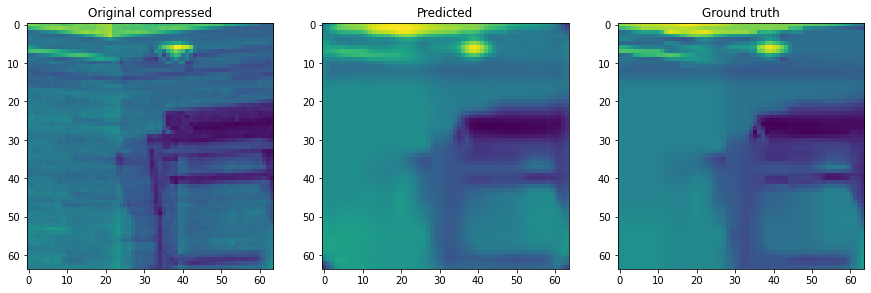

In [199]:
sns.reset_orig()
fig,ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(compressed[0,:,:,0])
ax[0].set_title('Original compressed')
ax[1].imshow(prediction[0,:,:,0])
ax[1].set_title('Predicted')
ax[2].imshow(ground_truth[0,:,:,0])
ax[2].set_title('Ground truth')
plt.show()